In [9]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'dc35791c-5ae0-4b74-8039-90b7eef4f2eb',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-09-02T13:49:31.614Z', 'error_code': 0, 'error_message': None, 'elapsed': 29, 'credit_count': 1, 'notice': None, 'total_count': 9482}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12330, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [10]:
import pandas as pd
pd.set_option('display.max_columns',None)
#type(data)

In [11]:
df=pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12330,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19915225.00000,19915225.00000,False,NaN,1,NaN,NaN,None,2025-09-02T13:48:00.000Z,110684.87532,67585170246.08856,10.81670,2.05011,1.48129,0.87037,-2.81442,2.22680,5.21734,2204314196092.77197,57.94700,2324382381717.91992,None,2025-09-02T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-02 19:19:35.927409
1,1027,Ethereum,ETH,ethereum,10503,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120705459.77311,120705459.77311,True,NaN,2,NaN,NaN,None,2025-09-02T13:48:00.000Z,4363.83547,36257071586.08871,11.47450,1.90063,-0.44462,-2.59413,25.12834,72.46230,66.23886,526738766456.35486,13.84690,526738766456.34998,None,2025-09-02T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-02 19:19:35.927409
2,825,Tether USDt,USDT,tether,144854,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,168027874497.47974,172732955297.31500,True,NaN,3,NaN,NaN,None,2025-09-02T13:47:00.000Z,1.00021,119143763008.77390,13.33600,-0.09768,0.02525,0.01775,0.01581,-0.02374,-0.01180,168063132663.33319,4.41800,172769200754.82999,None,2025-09-02T13:47:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-09-02 19:19:35.927409
3,52,XRP,XRP,xrp,1694,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,59482264023.00000,99985819185.00000,False,NaN,4,NaN,NaN,None,2025-09-02T13:48:00.000Z,2.81044,6584183486.41543,0.58490,1.13233,1.58690,-3.37580,-2.27008,26.15640,25.24512,167171254494.98215,4.38790,281043866168.82001,None,2025-09-02T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-02 19:19:35.927409
4,1839,BNB,BNB,bnb,2695,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,139187714.93000,139187714.93000,False,NaN,5,NaN,NaN,None,2025-09-02T13:48:00.000Z,848.81602,2531766467.82997,3.51510,0.61364,-0.45854,0.42952,13.15620,29.10046,26.93804,118144762133.02754,3.10580,118144762133.03000,None,2025-09-02T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-02 19:19:35.927409
5,5426,Solana,SOL,solana,989,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,540914893.46549,608757219.13124,True,NaN,6,525236893.30000,106216287372.29729,None,2025-09-02T13:48:00.000Z,202.22549,6878474662.00688,5.10790,1.79166,1.20588,6.88949,25.47499,35.22409,29.10952,109386778615.85333,2.87560,123106226070.59000,None,2025-09-02T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-02 19:19:35.927409
6,3408,USDC,USDC,usd-coin,31146,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,71783684061.96449,71783684061.96449,False,NaN,7,60901219650.23000,60897233914.58264,None,2025-09-02T13:48:00.000Z,0.99993,15808759928.56358,14.35320,0.00455,-0.00018,0.01726,-0.01651,-0.00947,0.01001,71778986113.54724,1.88690,71778986113.55000,None,2025-09-02T13:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-09-02 19:19:35.927409
7,1958,TRON,TRX,tron,1225,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94660669603.90840,94660677015.14360,True,NaN,8,94667886298.42999,32032402481.46276,None,2025-09-02T13:48:00.000Z,0.33837,897533552.65194,15.58930,0.51957,0.18832,-2.81077,4.33888,18.71160,24.41266,32029960

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'dc35791c-5ae0-4b74-8039-90b7eef4f2eb',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
     # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    df2=pd.json_normalize(data['data'])
    df2['timestamp']=pd.to_datetime('now')
    df_append=pd.DataFrame(df2)
    df=pd.concat([df2,df_append])

    

In [6]:
import os
from time import sleep
from time import time

for i in range(333):
    api_runner()
    print("API Runner Completed Successfully")
    sleep(20)
exit()

API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully


KeyboardInterrupt: 

In [12]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12330,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19915225.00000,19915225.00000,False,NaN,1,NaN,NaN,None,2025-09-02T13:48:00.000Z,110684.87532,67585170246.08856,10.81670,2.05011,1.48129,0.87037,-2.81442,2.22680,5.21734,2204314196092.77197,57.94700,2324382381717.91992,None,2025-09-02T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-02 19:19:35.927409
1,1027,Ethereum,ETH,ethereum,10503,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120705459.77311,120705459.77311,True,NaN,2,NaN,NaN,None,2025-09-02T13:48:00.000Z,4363.83547,36257071586.08871,11.47450,1.90063,-0.44462,-2.59413,25.12834,72.46230,66.23886,526738766456.35486,13.84690,526738766456.34998,None,2025-09-02T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-02 19:19:35.927409
2,825,Tether USDt,USDT,tether,144854,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,168027874497.47974,172732955297.31500,True,NaN,3,NaN,NaN,None,2025-09-02T13:47:00.000Z,1.00021,119143763008.77390,13.33600,-0.09768,0.02525,0.01775,0.01581,-0.02374,-0.01180,168063132663.33319,4.41800,172769200754.82999,None,2025-09-02T13:47:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-09-02 19:19:35.927409
3,52,XRP,XRP,xrp,1694,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,59482264023.00000,99985819185.00000,False,NaN,4,NaN,NaN,None,2025-09-02T13:48:00.000Z,2.81044,6584183486.41543,0.58490,1.13233,1.58690,-3.37580,-2.27008,26.15640,25.24512,167171254494.98215,4.38790,281043866168.82001,None,2025-09-02T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-02 19:19:35.927409
4,1839,BNB,BNB,bnb,2695,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,139187714.93000,139187714.93000,False,NaN,5,NaN,NaN,None,2025-09-02T13:48:00.000Z,848.81602,2531766467.82997,3.51510,0.61364,-0.45854,0.42952,13.15620,29.10046,26.93804,118144762133.02754,3.10580,118144762133.03000,None,2025-09-02T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-02 19:19:35.927409
5,5426,Solana,SOL,solana,989,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,540914893.46549,608757219.13124,True,NaN,6,525236893.30000,106216287372.29729,None,2025-09-02T13:48:00.000Z,202.22549,6878474662.00688,5.10790,1.79166,1.20588,6.88949,25.47499,35.22409,29.10952,109386778615.85333,2.87560,123106226070.59000,None,2025-09-02T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-02 19:19:35.927409
6,3408,USDC,USDC,usd-coin,31146,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,71783684061.96449,71783684061.96449,False,NaN,7,60901219650.23000,60897233914.58264,None,2025-09-02T13:48:00.000Z,0.99993,15808759928.56358,14.35320,0.00455,-0.00018,0.01726,-0.01651,-0.00947,0.01001,71778986113.54724,1.88690,71778986113.55000,None,2025-09-02T13:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-09-02 19:19:35.927409
7,1958,TRON,TRX,tron,1225,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94660669603.90840,94660677015.14360,True,NaN,8,94667886298.42999,32032402481.46276,None,2025-09-02T13:48:00.000Z,0.33837,897533552.65194,15.58930,0.51957,0.18832,-2.81077,4.33888,18.71160,24.41266,32029960

In [3]:
pd.set_option('display.float_format',lambda x: '%.5f' %x)

In [14]:
df3=df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,2.05011,1.48129,0.87037,-2.81442,2.22680,5.21734
Ethereum,1.90063,-0.44462,-2.59413,25.12834,72.46230,66.23886
Tether USDt,-0.09768,0.02525,0.01775,0.01581,-0.02374,-0.01180
XRP,1.13233,1.58690,-3.37580,-2.27008,26.15640,25.24512
BNB,0.61364,-0.45854,0.42952,13.15620,29.10046,26.93804
Solana,1.79166,1.20588,6.88949,25.47499,35.22409,29.10952
USDC,0.00455,-0.00018,0.01726,-0.01651,-0.00947,0.01001
TRON,0.51957,0.18832,-2.81077,4.33888,18.71160,24.41266
Dogecoin,1.68308,-1.58619,0.12128,6.78623,28.22203,9.67586


In [15]:
df4=df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     2.05011
              quote.USD.percent_change_24h    1.48129
              quote.USD.percent_change_7d     0.87037
              quote.USD.percent_change_30d   -2.81442
              quote.USD.percent_change_60d    2.22680
                                               ...   
Bitcoin Cash  quote.USD.percent_change_24h    4.55241
              quote.USD.percent_change_7d     5.99935
              quote.USD.percent_change_30d    5.57593
              quote.USD.percent_change_60d   17.73110
              quote.USD.percent_change_90d   41.36110
Length: 90, dtype: float64

In [16]:
df5=df4.to_frame(name='values')
df5

values
name                                              
Bitcoin      quote.USD.percent_change_1h   2.05011
             quote.USD.percent_change_24h  1.48129
             quote.USD.percent_change_7d   0.87037
             quote.USD.percent_change_30d -2.81442
             quote.USD.percent_change_60d  2.22680
...                                            ...
Bitcoin Cash quote.USD.percent_change_24h  4.55241
             quote.USD.percent_change_7d   5.99935
             quote.USD.percent_change_30d  5.57593
             quote.USD.percent_change_60d 17.73110
             quote.USD.percent_change_90d 41.36110

[90 rows x 1 columns]

In [17]:
df5.count()

values    90
dtype: int64

In [18]:
index=pd.Index(range(90))
df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,2.05011
1,Bitcoin,quote.USD.percent_change_24h,1.48129
2,Bitcoin,quote.USD.percent_change_7d,0.87037
3,Bitcoin,quote.USD.percent_change_30d,-2.81442
4,Bitcoin,quote.USD.percent_change_60d,2.22680
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,4.55241
86,Bitcoin Cash,quote.USD.percent_change_7d,5.99935
87,Bitcoin Cash,quote.USD.percent_change_30d,5.57593
88,Bitcoin Cash,quote.USD.percent_change_60d,17.73110


In [21]:
df7=df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,2.05011
1,Bitcoin,quote.USD.percent_change_24h,1.48129
2,Bitcoin,quote.USD.percent_change_7d,0.87037
3,Bitcoin,quote.USD.percent_change_30d,-2.81442
4,Bitcoin,quote.USD.percent_change_60d,2.22680
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,4.55241
86,Bitcoin Cash,quote.USD.percent_change_7d,5.99935
87,Bitcoin Cash,quote.USD.percent_change_30d,5.57593
88,Bitcoin Cash,quote.USD.percent_change_60d,17.73110


In [27]:
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,2.05011
1,Bitcoin,24h,1.48129
2,Bitcoin,7d,0.87037
3,Bitcoin,30d,-2.81442
4,Bitcoin,60d,2.22680
...,...,...,...
85,Bitcoin Cash,24h,4.55241
86,Bitcoin Cash,7d,5.99935
87,Bitcoin Cash,30d,5.57593
88,Bitcoin Cash,60d,17.73110


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

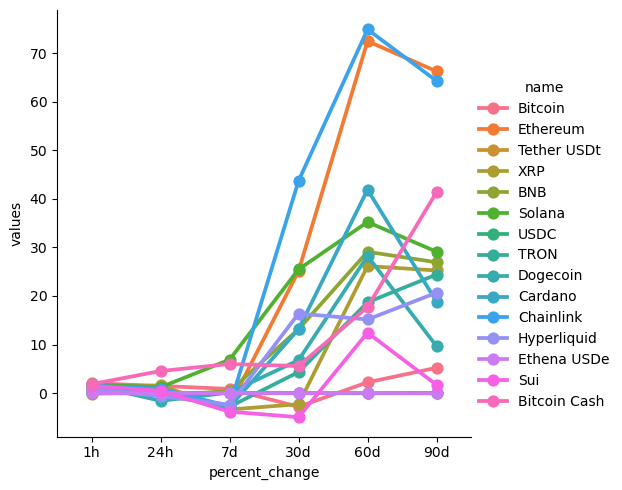

In [28]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')